# Building Interactive Dashboards with Panel

Authored by Hannah DeBaets

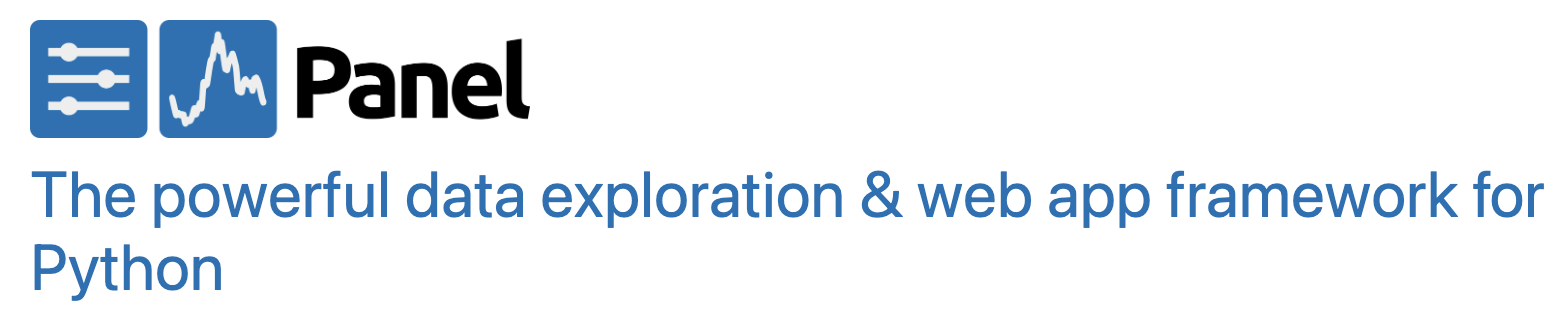


[Panel Documentation](https://panel.holoviz.org/index.html#)


## What are Dashboards?
*   Interactivity
  * Additional information without overwhelming
  *  Can democratize data access/exploration


## Why Panel as a Dashboarding tool?


*   Wraps around a wide variety of plotting libraries
  * (some are easier to implement than others)
* Can Share without Hosting
  * Runs in Jupyter Environments
  * Save to .html
* Python library
*   Relatively easy to use/get started
* Extensive documentation (too much?)



## Why might you use Panel?


*   Present data/findings from your research
*   GUI-like interface for basic analysis





In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import panel as pn
import panel.widgets as pnw
# depending on the environment you may need jupyter_bokeh

In [3]:
# Need to run pn.extension() for things to render.
# can include different options
pn.extension("plotly", "tabulator", theme='dark')

## Panel Basics


* Built on top of Param
*   [Layout Features](https://panel.holoviz.org/reference/index.html#layouts)
  * Used to spacially place design elements
  * Fundamentals
      * Row
      * Column
      * Accordion
  * Detail
      * Divider
      * Spacer
  
*   [Widgets](https://panel.holoviz.org/reference/index.html#widgets)
  * Used to interact with the elements
* pn.bind function
  * Links widgets to output
  * Other uses




# Layouts

In [4]:
# Rows separate elements horizontally
my_row = pn.Row("Item1", "Item2", "Item3")
my_row

Row
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)

In [5]:
# Columns separate elements vertically
my_column = pn.Column("Item1", "Item2", "Item3")
my_column

Column
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)

In [6]:
# We can do some basic list-like operations:
# append, extend, clear, insert, pop, remove
my_row.append("# Markdown notation example")
my_row

Row
    [0] Markdown(str)
    [1] Markdown(str)
    [2] Markdown(str)
    [3] Markdown(str)

In [7]:
my_column.pop(0)
my_column

Column
    [0] Markdown(str)
    [1] Markdown(str)

In [8]:
# for bulky elements, you can use Accordions to hide things
# names of the outermost element in the Accordion will automatically be the title
bulky_column = pn.Column(*[f"Item{i}" for i in range(10)], name="Example Column") # Adding the name provides a automatic header for the accordion section
bulky_column.insert(4, pn.layout.Divider()) # Divider is the horizontal line
pn.Accordion(bulky_column)

Accordion
    [0] Column(name='Example Column')
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Markdown(str)
        [3] Markdown(str)
        [4] Divider()
        [5] Markdown(str)
        [6] Markdown(str)
        [7] Markdown(str)
        [8] Markdown(str)
        [9] Markdown(str)
        [10] Markdown(str)

In [9]:
# Nesting Rows/Columns can create more specific layouts
pn.Row(pn.Column("Thing 1 Name:", "Thing 1"),
       pn.Spacer(width=100),
       pn.Column("Thing 2 Name:", "Thing 2"),
       pn.Spacer(width=100),
       pn.Column("Thing 3 Name:", "Thing 3"))
# You could also look into grid layout options
# I haven't tried that yet

Row
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
    [1] Spacer(width=100)
    [2] Column
        [0] Markdown(str)
        [1] Markdown(str)
    [3] Spacer(width=100)
    [4] Column
        [0] Markdown(str)
        [1] Markdown(str)

# Widgets


*   You'll want to keep track of the expected output type provided by each widget



In [10]:
# set up data for later use
def define_decade(year):
  decade = year // 10
  decade_str = str(decade) + "0's"
  return decade_str

df = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/top_movies_2020.csv")
df["Decade"] = df.Year.map(define_decade)
df = df.sort_values(by="Year", ascending=True)
df.head()

,Title,Gross,Gross (Adjusted),Year,Decade
136,The Four Horsemen of the Apocalypse,9183673,430255408,1921,1920's
9,Snow White and the Seven Dwarfs,184925486,1021330000,1937,1930's
0,Gone with the Wind,200852579,1895421694,1939,1930's
44,Pinocchio,84254167,631568921,1940,1940's
121,Sergeant York,16361885,450914384,1941,1940's


In [11]:
# Switches toggle between True and False
my_switch = pnw.Switch()
my_switch

Switch()

In [12]:
my_switch.value

False

In [13]:
# Value type matches the list element type
display(pnw.Select(options=list(df.columns), name="Example Select Using Options"))
col_groups = {"Profits": ["Gross", "Gross (Adjusted)"], "Film Production": ["Title", "Year", "Decade"]}
# When using a dictionary to designate groups...
# value type matches the type of the dictionary values
my_select = pnw.Select(groups=col_groups, name="Example Select Using Groups")
display(my_select)

Select(name='Example Select U..., options=['Title', 'Gross', ...], value='Title')

Select(groups={'Profits': ['Gross', ...}, name='Example Select U..., value='Gross')

In [14]:
# Value type is a list
my_multi_choice = pnw.MultiChoice(options=list(df.columns), name="Type here:")
pn.Column(pn.Spacer(height=50), my_multi_choice)

Column
    [0] Spacer(height=50)
    [1] MultiChoice(name='Type here:', options=['Title', 'Gross', ...])

In [15]:
# Radio buttons - value type same as with Select,
# either
plot_option = pnw.RadioButtonGroup(options={"Scatter Plot": px.scatter,
                                            "Strip Plot": px.strip,
                                            "Box Plot": px.box})
plot_option

RadioButtonGroup(options={'Scatter Plot': <function...}, value=<function scatter a...)

In [16]:
# Value is a string type
# For unspecified strings
display(pnw.TextInput(placeholder="Your Text Here...")) # display acts similar to print
# # or
pnw.TextAreaInput(placeholder="Your Text Here...")

TextInput(placeholder='Your Text Here...')

TextAreaInput(placeholder='Your Text Here...')

In [17]:
# Value is a float type
float_slider = pnw.EditableFloatSlider(name='Transparency', start=0, end=1, step=0.01, value=1)
float_slider

EditableFloatSlider(name='Transparency', step=0.01, value=1, width=300)

In [18]:
# callback functions must have event as a parameter
def example_callback_function(event):
  # does something
  print("You Clicked Me")

# initialize button

basic_button = pnw.Button(name="Click Me", # Text on button Note: can use unicode for symbols
                          button_type="primary" # acts as color
                          )
# add functionality to the button
basic_button.on_click(example_callback_function)
basic_button

Button(button_type='primary', name='Click Me')

If you want to add more parameters to button functions, you can use [partial functions](https://docs.python.org/3/library/functools.html#functools.partial) (if other parameters are not updating), or you can use pn.bind() as a partial function, if the other parameters may update.


```
# for partial functions
from functools import partial
```



In [19]:
from functools import partial

def sum_with_x(y, x):
  return y+x

# example = pn.bind(function=sum_with_x,
#                   x=4,
#                   y=4)

add_5 = partial(sum_with_x, x=5)
add_5(3) # 8

# here, add_5 is essentially a function that looks like this
# def add_5(y):
#   return y+5

# So, this function add_5 has been "partially" defined.



def example_callback_function(event, x):
  # does something
  print("You Clicked Me"*x)


new_button_callback = partial(example_callback_function, x=2)

basic_button = pnw.Button(name="Click Me", # Text on button Note: can use unicode for symbols
                          button_type="primary" # acts as color
                          )
# add functionality to the button
basic_button.on_click(new_button_callback)
basic_button

Button(button_type='primary', name='Click Me')

# Tying things together with pn.bind()

In [20]:
# Widgets have 'values' which are a type we're used to interacting with, but aren't reactive
# and they have param.values, which update, but are a type we aren't used to interacting with
pn.Row(my_switch,
       pn.Column(f"Value Type {type(my_switch.value)}", my_switch.value),
       pn.Column(f"Param Value Type {type(my_switch.param.value)}", my_switch.param.value)
       )

Row
    [0] Switch()
    [1] Column
        [0] Markdown(str)
        [1] Str(bool)
    [2] Column
        [0] Markdown(str)
        [1] Checkbox(name='Value')

### pn.bind to the rescue!

Using pn.bind:
1. Write a function that uses inputs that match the widget's *value type*
2. Wrap the function in bind using example syntax below:


```
def my_function_to_wrap(example_list, example_bool, example_string):
  pass

# pn.bind takes a function, then additional arguments that are parameters
# of that function
# like so...
bound_result = pn.bind(function=my_function_to_wrap,
                        example_list=my_multi_choice,
                        example_bool=my_switch,
                        example_string=my_select)

pn.Row(bound_result)
```



3. Render the result in a Panel Layout object (Row/Column, etc.)

In [21]:
# let's do an example with a plot

x_axis = pnw.Select(groups=col_groups, name="X-axis")
y_axis = pnw.Select(groups=col_groups, name="Y-axis")

plot = pn.bind(px.scatter, # the function we're calling
        df, # you can use either positional or named arguments
        x=x_axis, # column name selection
        y=y_axis, # column name selection
        opacity=float_slider,
        width=800,
        height=800,
        title = "Interactive Plot Example"
               );

options = pn.Row(x_axis,
                 y_axis,
                 float_slider
                 )

pn.Column(options,
          plot
          )

Column
    [0] Row
        [0] Select(groups={'Profits': ['Gross', ...}, name='X-axis', value='Gross')
        [1] Select(groups={'Profits': ['Gross', ...}, name='Y-axis', value='Gross')
        [2] EditableFloatSlider(name='Transparency', step=0.01, value=1, width=300)
    [1] ParamFunction(function, _pane=Plotly, defer_load=False)

In [22]:
interactive_plot_type = pn.bind(plot_option, # the type of plot, selected by the radio button group
                                df,
                                x=x_axis, # column name selection
                                y=y_axis, # column name selection
                                hover_data=my_multi_choice,
                                width=800,
                                height=800,
                                title = "Interactive Plot Example"
                                )


interactive_plot_type_options = pn.Row(x_axis,
                                        y_axis,
                                        plot_option,
                                        my_multi_choice # this isn't actually connected to anything
                                        )

pn.Column(interactive_plot_type_options,
          interactive_plot_type
          )

Column
    [0] Row
        [0] Select(groups={'Profits': ['Gross', ...}, name='X-axis', value='Gross')
        [1] Select(groups={'Profits': ['Gross', ...}, name='Y-axis', value='Gross')
        [2] RadioButtonGroup(options={'Scatter Plot': <function...}, value=<function scatter a...)
        [3] MultiChoice(name='Type here:', options=['Title', 'Gross', ...])
    [1] ParamFunction(function, _pane=Plotly, defer_load=False)

# Understanding pn.bind


*   Links elements and updates upon changes
*   Returns a function. Function will render when:
  * Passed into a panel layout element
  * Passed into another pn.bind function



In [23]:
# our bound function from above
print(interactive_plot_type)
print(type(interactive_plot_type))

<function bind.<locals>.wrapped at 0x7e7bef5025f0>
<class 'function'>


# Prepping Farmer's Market Data/Interactive Elements

In [24]:
# @title Tabs and Picture Examples
# To get a link that works for panel PNG panes, take the FILEID from the sharable link
# and update it in the following link
# "https://lh3.googleusercontent.com/d/FILEID"
# Example Sharable link:
# https://drive.google.com/file/d/1MorbW5mV-HqlqbOGOXCtxtNZaYMKqPV3/view?usp=sharing
# Example FILEID = 1MorbW5mV-HqlqbOGOXCtxtNZaYMKqPV3

#### Photo walk through ####


meet_here = pn.Column("## Meet By The Van at 1:10PM.",
                              pn.pane.PNG("https://lh3.googleusercontent.com/d/1atEZBh0g4_0Y8aterw1jwBRAOxtlsG1B",
                                          width=700),
                              name="Meet By The Van")

unload = pn.Column("## Help unload the empty crates from the van.",
                              pn.pane.PNG("https://lh3.googleusercontent.com/d/1UgnhBSupDUuIe8mOUEQM1hDr-UUeR4t8",
                                          width=700),
                              name="Unload Crates")

bags = pn.Column("## Distribute empty crates to the vendors. Bring plastic liners for small items - grapes, cherries, etc.",
                              pn.pane.PNG("https://lh3.googleusercontent.com/d/1PNq8yP7wPCh-UGMyt_EjatLx3JF113rq",
                                          width=700),
                              name="Distribute Crates pt.1")


distribute_crates = pn.Column("## Place 3-6 empty crates in front of each stall.",
                              pn.pane.PNG("https://lh3.googleusercontent.com/d/1plfSc-MxIFaDowFbF-46_moRhLOPFz_q",
                                          height=700),
                              name="Distribute Crates pt.2")

fruit_veg = pn.Column("## We weigh the produce and provide donation receipts to the vendors.",
                      pn.pane.PNG("https://lh3.googleusercontent.com/d/1HWbBKvaGQGwDp37ZP9nBURL_wI8du3kp",
                                  width=700),
                      name="Collected Fruit and Vegetables")

# https://drive.google.com/file/d/1MorbW5mV-HqlqbOGOXCtxtNZaYMKqPV3/view?usp=sharing
transport = pn.Column("## Unload the food on the truck and tell the weighers which\n## crates came from which vendor.",
                      pn.pane.PNG("https://lh3.googleusercontent.com/d/1MorbW5mV-HqlqbOGOXCtxtNZaYMKqPV3",
                                  height=700),
                      name="Transport Collected Food on Carts")

tabs = pn.Tabs(meet_here,
               unload,
               bags,
               distribute_crates,
               transport,
               fruit_veg,
               name="# Process")
# tabs

In [25]:
# @title Data Processing with Pandas

market = pd.read_csv("https://docs.google.com/spreadsheets/d/10EtkFJtNpHncxizd09getuMn0ytRqqU4uJwS7uUqKjY/export?format=csv", na_values=[0], parse_dates=["Date"])
# market = pd.read_csv("All_Data.csv", na_values=[0], parse_dates=["Date"])
market = market.fillna(0)
market = market.set_index("Date")

# Get totals
market["Weekly Total"] = market.apply(sum, axis="columns")
market["Cumulative Total"] = market["Weekly Total"].cumsum()

# pull out individual month and date values
market["month"] = market.index.month
market["year"] = market.index.year
# market.head()

In [26]:
# @title
# Plot with cummulative data and line - Help us get to 1 Million Pounds of Produce

def line_plot(market, is_cumulative=True):
  if is_cumulative:
    y_values = "Cumulative Total"
    title = "Help us reach 1 million pounds of produce!"
    line_val = 1000000
  else:
    y_values = "Weekly Total"
    title = "Help us collect a TON of produce!"
    line_val = 2000
  fig = px.line(market, x=market.index, y=y_values, title=title, width=1200, height=600)
  fig.add_hline(y=line_val)
  return fig

cumsum = pnw.Switch(name="Cumulative/Weekly")
cumulative_total = market.iloc[-1].loc["Cumulative Total"]

recruiting = pn.Row(pn.bind(line_plot, market=market, is_cumulative=cumsum),
       pn.Column("Turn On Cumulative Totals",
                 cumsum,
                 "## Current Total Collected:",
                 f"### {cumulative_total} lbs",
                 "## Last Updated:",
                 "### " + str(max(market.index)).split()[0]))




# Plot total by week by vendor
# X top donors - Shift between Fruits * Veg
# Plot weekly average by month, color/shape by year?
# Map of meeting location and driving directions to the secondary location

In [27]:
# @title
# market["month"] = market.index.month
# market["year"] = market.index.year

In [28]:
# @title
import numpy as np

def group_calculations(df, by_col, date_range):
  subset = df.loc[date_range[0]: date_range[1]]
  to_return = subset.groupby(by_col)["Weekly Total"].agg([min, max, np.mean, sum])
  return to_return

def cat_plots(df, by_col, date_range, plot_type, hover_data=[], vendor="Weekly Total"):
  relevant_cols = [by_col, vendor] + hover_data
  subset = df.loc[date_range[0]: date_range[1], relevant_cols]
  fig = plot_type(subset, x=by_col,
                  y=vendor,
                  hover_data=hover_data,
                  title=f"{vendor} Collected"
                  )
  return fig

groups = pnw.RadioButtonGroup(options=["month", "year"], name="Group Data By:")

date_range_slider = pn.widgets.DateRangeSlider(
    name='Only Include Data Between',
    start=min(market.index), end=max(market.index),
    step=7 # jump by week b/c weekly collection
)
catplot_type = pnw.RadioButtonGroup(options={"Strip Plot": px.strip, "Box Plot": px.box}, name="Plot Type")

vendors = list(market.columns)[:-3]
vendor_multichoice = pnw.MultiChoice(options=vendors, name="Hover Data Vendors")
vendor_select = pnw.Select(options=vendors, name="Vendor Selection", value="Weekly Total")

my_catplot = pn.bind(cat_plots,
                     df=market,
                     by_col=groups,
                     date_range=date_range_slider,
                     plot_type=catplot_type,
                     vendor=vendor_select
                    #  hover_data=vendor_multichoice
                     )

my_dataframe = pn.bind(group_calculations,
                       df=market,
                       by_col=groups,
                       date_range=date_range_slider)

weekly_metrics = pnw.Tabulator(my_dataframe)
linked_dataset = pn.Row(my_catplot,
       pn.Column("### Weekly Metric Data Control",
                 date_range_slider,
                 groups,
                 "### Plot Controls",
                 catplot_type,
                 vendor_select
                #  vendor_multichoice,
                 ),
       pn.Spacer(width=50),
       pn.Column(weekly_metrics))

In [29]:
def save_dashboard(event, column):
  column.save(filename="Produce_collected.html" , title="Farmer's Market")

# Interactive Dashboard Here:

In [30]:
full_dashboard = pn.Row(pn.Column("# Help Us Glean Produce from the Farmer's Market",
                           "## Our Process",
                           tabs,
                           recruiting,
                           linked_dataset))

save_button = pnw.Button(name="Save as .html", button_type="primary")
save_function = pn.bind(save_dashboard, column=full_dashboard[0])
save_button.on_click(save_function)
full_dashboard.append(save_button)

full_dashboard

Row
    [0] Column
        [0] Markdown(str)
        [1] Markdown(str)
        [2] Tabs(name='# Process')
            [0] Column(name='Meet By The Van')
                [0] Markdown(str)
                [1] PNG(str, width=700)
            [1] Column(name='Unload Crates')
                [0] Markdown(str)
                [1] PNG(str, width=700)
            [2] Column(name='Distribute Crates pt.1')
                [0] Markdown(str)
                [1] PNG(str, width=700)
            [3] Column(name='Distribute Crates pt.2')
                [0] Markdown(str)
                [1] PNG(str, height=700)
            [4] Column(name='Transport Collected F...)
                [0] Markdown(str)
                [1] PNG(str, height=700)
            [5] Column(name='Collected Fruit a...)
                [0] Markdown(str)
                [1] PNG(str, width=700)
        [3] Row
            [0] ParamFunction(function, _pane=Plotly, defer_load=False)
            [1] Column
                [0] Markdown(str)
                [1] Switch(name='Cumulative/Weekly')
                [2] Markdown(str)
                [3] Markdown(str)
                [4] Markdown(str)
                [5] Markdown(str)
        [4] Row
            [0] ParamFunction(function, _pane=Plotly, defer_load=False)
            [1] Column
                [0] Markdown(str)
                [1] DateRangeSlider(end=Timestamp('2023-08-27 0..., name='Only Include D..., start=Timestamp('2015-01-04 0..., step=7, value=(Timestamp('2015-01-04 00:..., value_end=Timestamp('2023-08-27 0..., value_start=Timestamp('2015-01-04 0...)
                [2] RadioButtonGroup(name='Group Data By:', options=['month', 'year'], value='month')
                [3] Markdown(str)
                [4] RadioButtonGroup(name='Plot Type', options={'Strip Plot': <function s...}, value=<function strip a...)
                [5] Select(name='Vendor Selection', options=["Brother's Ranch", ...], value='Weekly Total')
            [2] Spacer(width=50)
            [3] Column
                [0] Tabulator(value=          min  ...)
    [1] Button(button_type='primary', name='Save as .html')

## Using Panel with Folium

In [31]:
import folium

In [32]:
# let's build an example with folium
# using starting coordinates 0,0 and zoom_start=4


folium.Map((0,0), zoom_start=4)

In [33]:
# pn.extension(sizing_mode="stretch_width") # you might need this if troubleshooting
lat_value = pnw.FloatInput(name='Latitude', value=5., step=1e-6, start=-90, end=90)
long_value = pnw.FloatInput(name='Latitude', value=5., step=1e-6, start=-180, end=180)


def make_map(latitude, longitude):
  return folium.Map((latitude,longitude), zoom_start=4)

my_map = pn.bind(make_map,latitude=lat_value, longitude=long_value)
pn.Column(pn.Row(lat_value, long_value),
          pn.pane.plot.Folium(my_map, height=400, width=600))

Column
    [0] Row
        [0] FloatInput(end=90, name='Latitude', start=-90, step=1e-06, value=5.0)
        [1] FloatInput(end=180, name='Latitude', start=-180, step=1e-06, value=5.0)
    [1] Folium(Map, height=400, sizing_mode='fixed', width=600)

In [34]:
# @title
def interactive_map(latitude, longitude):
  m = folium.Map((latitude, longitude), zoom_start=5)
  folium.Marker(location=(0,0),
                popup="Testing",
                icon=folium.Icon(color="red",
                                 icon="thermometer-empty", # more icons here: https://fontawesome.com/v4/icons/
                                 prefix='fa', # include this if using font awesome icons
                                 )).add_to(m)
  return m


lat_val = pnw.FloatInput(name='Latitude',
                         value=0.,
                         step=1e-6, # need fairly specific values
                         start=-90, # googled valid ranges
                         end=90)

long_val = pnw.FloatInput(name='Longitude',
                          value=0.,
                          step=1e-6,
                          start=-180,
                          end=180)

my_map = pn.bind(interactive_map,
                 latitude=lat_val,
                 longitude=long_val)



my_map_col = pn.Column(pn.Row(lat_val, long_val),
          pn.pane.plot.Folium(my_map, height=400, width=800))
my_map_col

Column
    [0] Row
        [0] FloatInput(end=90, name='Latitude', start=-90, step=1e-06)
        [1] FloatInput(end=180, name='Longitude', start=-180, step=1e-06)
    [1] Folium(Map, height=400, sizing_mode='fixed', width=800)